In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
data = pd.read_csv('Electric_Production.csv',parse_dates = ['DATE'],index_col= 'DATE')
data

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [227]:
data.rename(columns = {'IPG2211A2N':'sales'},inplace = True)

In [228]:
data_new = data['1985':'2000'][['sales']]
datac = data['1985':'2002'][['sales']]
data_new

,sales
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2000-08-01,99.3704
2000-09-01,90.9178
2000-10-01,83.1408


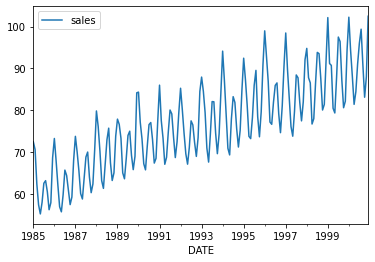

In [229]:
data_new.plot()

# Checking weather the data is stationary or not 1990-2018 data

# Determing rolling statistics

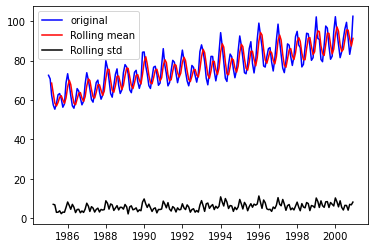

In [230]:
std = data_new.rolling(window=4).std()
mean = data_new.rolling(window=3).mean()

original = plt.plot(data_new,color='blue',label='original')
mean = plt.plot(mean,color='red',label='Rolling mean')
std = plt.plot(std,color='black',label='Rolling std')
plt.legend(loc='best')
plt.show(block = False)
#Here the mean is continiously changing so given data is not in stationary.... so we have to convert it into the stationary
#using another method

# Now we use Dickey Fuller Test if P close to 0 then it is in stationary otherwise P~=1 not in stationary

In [231]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data_new)
print("P value is :",dftest[1])
# P = 0.92 confirms that it was not in stationary

P value is : 0.9522057164965182


# Applying Log method

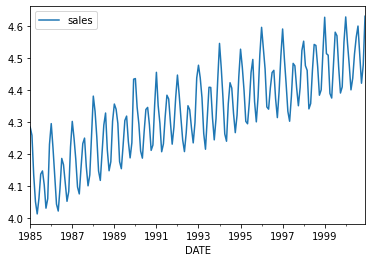

In [232]:
#Estimating log method to convert it stationary
data_log = np.log(data_new)
data_log.plot()

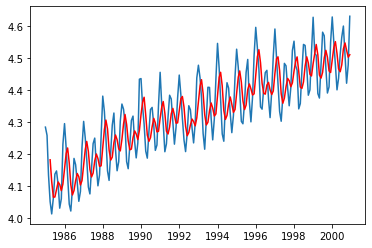

In [233]:
# applying mean & std to log method
mean = data_log.rolling(window=4).mean()
std = data_log.rolling(window=4).std()
plt.plot(data_log)
plt.plot(mean,color='red')
#still no improvement and it remains unstationary

In [234]:
#lets confirm unstationarity using dickey fuller test
df_test = adfuller(data_log)
print('P value:',df_test[1])
#yes p value close to 1 so its in unstationary

P value: 0.8051248340346354


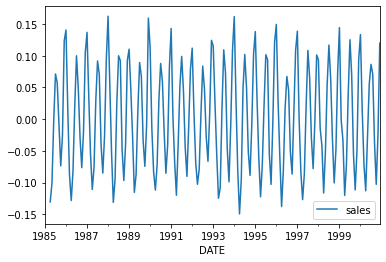

In [235]:
#lets subtract our data_log with mean of data_log
data_new_log= data_log - mean
data_new_log.plot()

#looks like it converted to stationary now lets confirm it using dickey fuller test(i am ignoring rolling statistics)

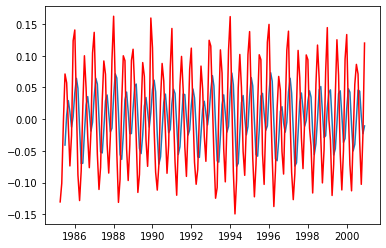

In [236]:
mean = data_new_log.rolling(window=4).mean()
plt.plot(mean)
plt.plot(data_new_log, color = 'red')

In [237]:
data_new_log.dropna(inplace=True)
data_new_log.head(10)

,sales
DATE,
1985-04-01,-0.130554
1985-05-01,-0.101142
1985-06-01,-0.003175
1985-07-01,0.071232
1985-08-01,0.057270
1985-09-01,-0.008509
1985-10-01,-0.073824
1985-11-01,-0.025181
1985-12-01,0.123605


In [238]:
df_test = adfuller(data_new_log)
print('Final P value',df_test[1])
#ha ha very close to zero so its in stationary Congratulations!

Final P value 2.7703440550965505e-05


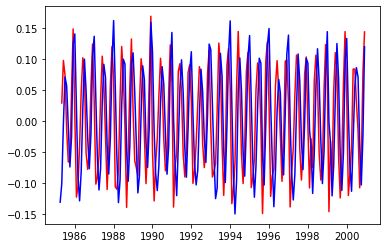

In [239]:
data_log_shifting = data_new_log - data_new_log.shift()
plt.plot(data_log_shifting, color='red')
plt.plot(data_new_log, color='blue')

In [240]:
data_new_log

,sales
DATE,
1985-04-01,-0.130554
1985-05-01,-0.101142
1985-06-01,-0.003175
1985-07-01,0.071232
1985-08-01,0.057270
...,...
2000-08-01,0.071183
2000-09-01,-0.036149
2000-10-01,-0.102877


In [241]:
data_new_log.shift()

,sales
DATE,
1985-04-01,NaN
1985-05-01,-0.130554
1985-06-01,-0.101142
1985-07-01,-0.003175
1985-08-01,0.071232
...,...
2000-08-01,0.086372
2000-09-01,0.071183
2000-10-01,-0.036149


In [242]:
data_log_shifting

,sales
DATE,
1985-04-01,NaN
1985-05-01,0.029412
1985-06-01,0.097967
1985-07-01,0.074408
1985-08-01,-0.013962
...,...
2000-08-01,-0.015188
2000-09-01,-0.107332
2000-10-01,-0.066728


In [243]:
data_log_shifting.dropna(inplace=True)
df_test = adfuller(data_log_shifting)
print('P value: ',df_test[1])

P value:  1.1260034909117446e-15


# Using seasonal decomposing function

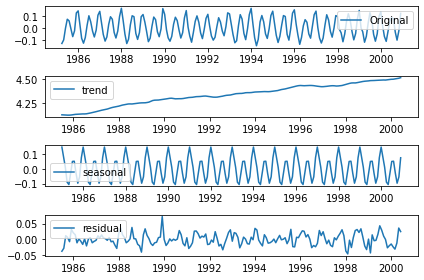

In [244]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(data_new_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()

In [245]:
decomposed_logdata = residual
decomposed_logdata.dropna(inplace=True)
#we are using adfuller test many times so its better to create a function
def ADFtest(x):
    df_test = adfuller(x)
    print("P value:",df_test[1])
    
ADFtest(decomposed_logdata)

P value: 7.091902250494138e-10


In [246]:
from statsmodels.tsa.arima_model import ARIMA as arima
model = arima(data_log, order=(1,1,1))
results = model.fit(disp=-1)
 

C:\Users\user\myanaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\myanaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\myanaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [247]:
predictions_arima = pd.Series(results.fittedvalues, copy=True)
print(predictions_arima.head())
predictions_arima

DATE
1985-02-01    0.002053
1985-03-01    0.008198
1985-04-01    0.040088
1985-05-01    0.058968
1985-06-01    0.063912
dtype: float64


DATE
1985-02-01    0.002053
1985-03-01    0.008198
1985-04-01    0.040088
1985-05-01    0.058968
1985-06-01    0.063912
                ...   
2000-08-01   -0.017600
2000-09-01   -0.031765
2000-10-01    0.008345
2000-11-01    0.048478
2000-12-01    0.023992
Length: 191, dtype: float64

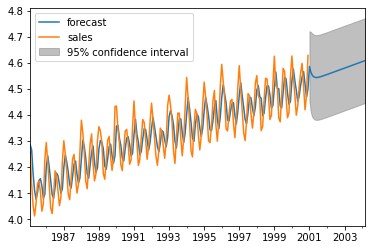

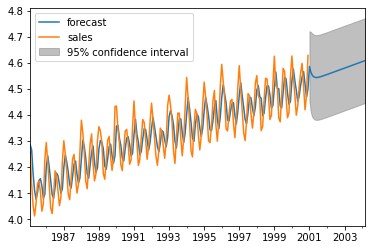

In [248]:
results.plot_predict(1,230)

In [249]:

res = results.forecast(steps = 120)
 

In [250]:
 res

(array([4.58697236, 4.56428931, 4.55259606, 4.54700996, 4.54481768,
        4.54451138, 4.54525315, 4.54657733, 4.54822517, 4.55005287,
        4.55198052, 4.55396371, 4.55597777, 4.55800899, 4.56004973,
        4.56209577, 4.56414476, 4.56619538, 4.56824691, 4.57029894,
        4.57235126, 4.57440373, 4.57645629, 4.5785089 , 4.58056153,
        4.58261418, 4.58466684, 4.5867195 , 4.58877216, 4.59082483,
        4.59287749, 4.59493016, 4.59698282, 4.59903549, 4.60108816,
        4.60314083, 4.60519349, 4.60724616, 4.60929883, 4.61135149,
        4.61340416, 4.61545683, 4.6175095 , 4.61956216, 4.62161483,
        4.6236675 , 4.62572016, 4.62777283, 4.6298255 , 4.63187816,
        4.63393083, 4.6359835 , 4.63803617, 4.64008883, 4.6421415 ,
        4.64419417, 4.64624683, 4.6482995 , 4.65035217, 4.65240484,
        4.6544575 , 4.65651017, 4.65856284, 4.6606155 , 4.66266817,
        4.66472084, 4.66677351, 4.66882617, 4.67087884, 4.67293151,
        4.67498417, 4.67703684, 4.67908951, 4.68